# Титаник. Кто выживет?

https://www.kaggle.com/c/titanic/

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Данные

In [3]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# EDA

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [9]:
sns.boxplot?

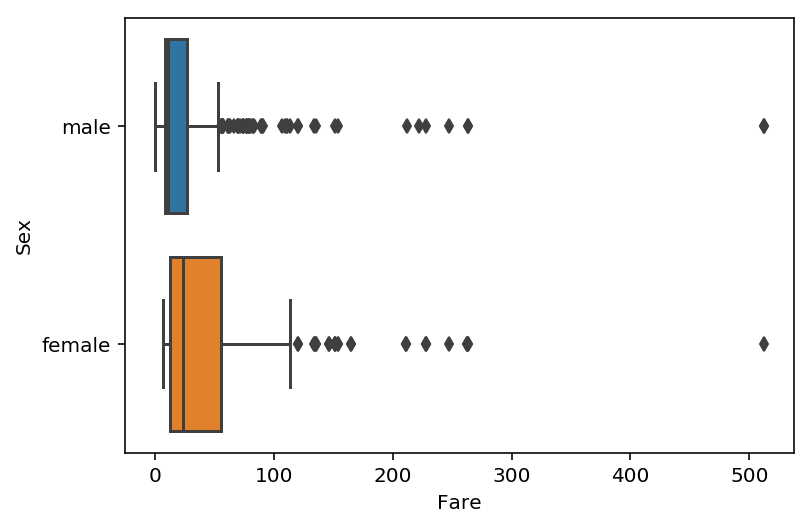

In [10]:
sns.boxplot(data=train, x='Fare', y='Sex')

In [11]:
train.groupby('Sex')['Pclass'].value_counts(normalize=True)

Sex     Pclass
female  3         0.458599
        1         0.299363
        2         0.242038
male    3         0.601386
        1         0.211438
        2         0.187175
Name: Pclass, dtype: float64

### Фичи

чтобы одинаковым образом обработать train и test и не дублировать все операции 2 раза, соединим эти два набора данных в один, не забыв при этом:
1. выкинуть целевую переменную из train
2. проверить на соответствие набора признаков друг другу
3. добавить флаг того, является ли объект тестовым или нет

In [12]:
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [13]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [14]:
train['is_test'] = 0
test['is_test'] = 1

In [15]:
df = pd.concat([train, test])

супер, теперь полный набор данных можно обрабатывать вместе и в любой момент, уже обработанными, обратно разъединить на обучающую и тестовую выборки

Пол male/female закодируем в 1/0 и удалим переменные, с которыми мы не будем сейчас работать

In [16]:
df["isMale"] = df.Sex.replace({"male": 1, "female":0})
df.drop(["Sex", "Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

признаки, значения которых составляют небольшой перечислимый набор, закодируем в отдельные столбцы 

In [17]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [18]:
df_dummies = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [19]:
df_dummies.head(10)

,Age,SibSp,Parch,Fare,is_test,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
5,NaN,0,0,8.4583,0,1,0,0,1,0,1,0
6,54.0,0,0,51.8625,0,1,1,0,0,0,0,1
7,2.0,3,1,21.0750,0,1,0,0,1,0,0,1
8,27.0,0,2,11.1333,0,0,0,0,1,0,0,1
9,14.0,1,0,30.0708,0,0,0,1,0,1,0,0


In [20]:
df_dummies.isnull().sum()

Age           263
SibSp           0
Parch           0
Fare            1
is_test         0
isMale          0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [21]:
X_train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

In [22]:
columns = X_train.columns

In [23]:
X_train.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,1,0,0,1
5,NaN,0,0,8.4583,1,0,0,1,0,1,0
6,54.0,0,0,51.8625,1,1,0,0,0,0,1
7,2.0,3,1,21.0750,1,0,0,1,0,0,1
8,27.0,0,2,11.1333,0,0,0,1,0,0,1
9,14.0,1,0,30.0708,0,0,1,0,1,0,0


### Заполнение пустых значений

заполним пустые значения средними по соответственным признакам

In [24]:
from sklearn.preprocessing import Imputer

In [25]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [27]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)

In [28]:
X_train_imputed.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.000000,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.000000,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.000000,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.000000,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,29.699118,0.0,0.0,8.4583,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,54.000000,0.0,0.0,51.8625,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,2.000000,3.0,1.0,21.0750,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,27.000000,0.0,2.0,11.1333,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,14.000000,1.0,0.0,30.0708,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Нормировка значений

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(X_train_imputed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
X_train_imputed_scaled = scaler.transform(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)

In [33]:
X_train_imputed_scaled.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
1,0.638789,0.432793,-0.473674,0.786845,-1.355574,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710
2,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
3,0.407926,0.432793,-0.473674,0.420730,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
4,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
5,0.000000,-0.474545,-0.473674,-0.478116,0.737695,-0.565685,-0.510152,0.902587,-0.482043,3.251373,-1.614710
6,1.870059,-0.474545,-0.473674,0.395814,0.737695,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
7,-2.131568,2.247470,0.767630,-0.224083,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
8,-0.207709,-0.474545,2.008933,-0.424256,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
9,-1.208115,0.432793,-0.473674,-0.042956,-1.355574,-0.565685,1.960202,-1.107926,2.074505,-0.307562,-1.614710


In [34]:
X_test_imputed_scaled = scaler.transform(imputer.transform(X_test))

### Offtop: попробуем визуализировать всех пассажиров: есть ли там кластеры?
### PCA + clustering

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2)

In [37]:
ppl = pca.fit_transform(X_train_imputed_scaled)

всего 2 фичи объясняют 41% всего разнообразия пассажиров:

In [38]:
pca.explained_variance_ratio_.sum()

0.410175541602073

классно, видно 6 кластеров пассажиров: внутри кластера они похожи друг на друга, межу кластерами - нет:

Text(0.5, 1.0, 'Пассажиры Титаника')

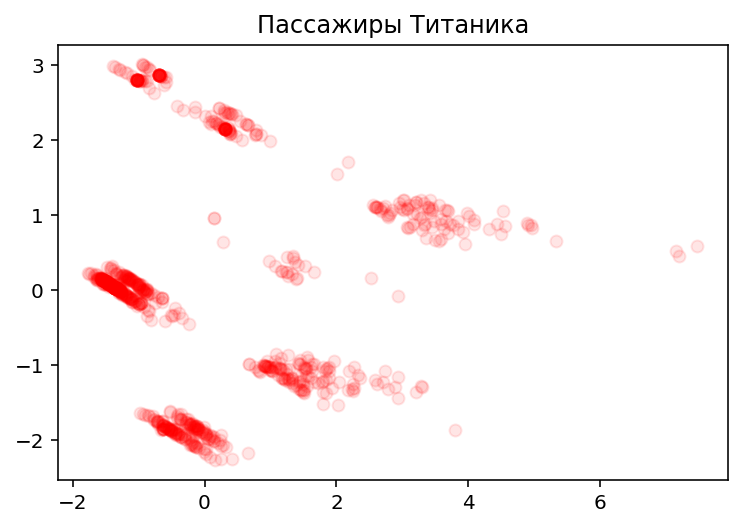

In [39]:
plt.plot(ppl[:,0], ppl[:,1], 'ro', alpha=0.1)
plt.title('Пассажиры Титаника')

можно попробовать кластеризовать по 7 кластерам и проверить, что получится:

In [40]:
from sklearn.cluster import KMeans

In [41]:
n_clusters = 7

In [42]:
kmeans = KMeans(n_clusters=n_clusters)

In [43]:
kmeans.fit(X_train_imputed_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
cluster_labels = kmeans.predict(X_train_imputed_scaled)

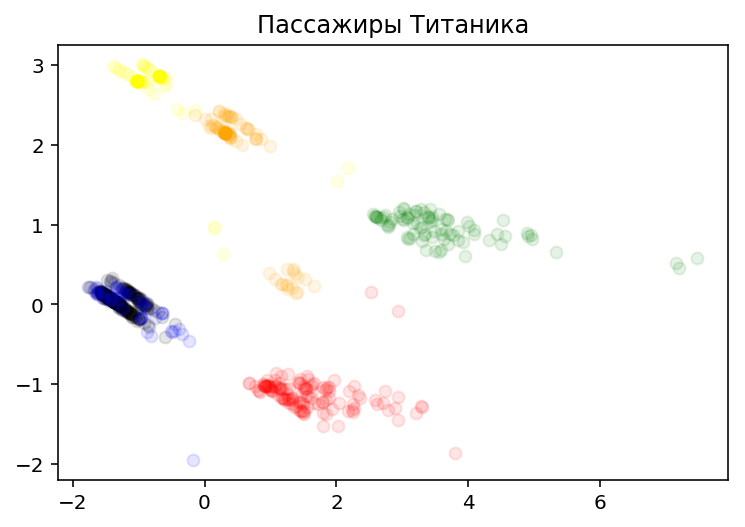

In [45]:
plt.title('Пассажиры Титаника')
for i,color in zip(range(n_clusters),{'blue','red','green','black','orange','yellow'}):
    t = ppl[cluster_labels==i]
    plt.plot(t[:,0], t[:,1], 'ro', alpha=0.1, c=color)

эти номера кластеров можно было бы подать как ещё одна фича

### Разделение на обучающую и тестирующую выборки

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train_imputed_scaled, y_train, test_size=0.2)

In [48]:
X_train_fin.shape

(712, 11)

In [49]:
X_val.shape

(179, 11)

In [50]:
X_test_imputed_scaled.shape

(418, 11)

In [51]:
y_train_fin.shape

(712,)

In [52]:
y_val.shape

(179,)

### Обучение с кросс-валидацией

кросс-валидация поможет нам подобрать лучший параметр регуляризации

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [54]:
cs = 10**np.linspace(-3,1,5)
cs

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [55]:
grid = {'C': cs}
gridsearch = GridSearchCV(LogisticRegression(), grid, scoring='accuracy', cv=5)

In [56]:
%%time
gridsearch.fit(X_train_fin, y_train_fin)

/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

CPU times: user 136 ms, sys: 0 ns, total: 136 ms
Wall time: 281 ms


/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [82]:
sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [58]:
gridsearch.best_params_

{'C': 0.1}

In [59]:
best_C = gridsearch.best_params_["C"]

# Оценка точности

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
clf = LogisticRegression(C=best_C)

In [62]:
clf.fit(X_train_fin, y_train_fin)

/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
y_val_pred = clf.predict(X_val)

In [64]:
accuracy_score(y_val, y_val_pred)

0.8379888268156425

# Финальное предсказание

In [65]:
clf.fit(X_train_imputed_scaled, y_train)

/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

предсказание вероятностей принадлежности классу 0 и 1:

In [66]:
clf.predict_proba(X_test_imputed_scaled)[:10]

array([[0.87122043, 0.12877957],
       [0.63004594, 0.36995406],
       [0.84442941, 0.15557059],
       [0.88731227, 0.11268773],
       [0.44402082, 0.55597918],
       [0.83691507, 0.16308493],
       [0.33409292, 0.66590708],
       [0.76813556, 0.23186444],
       [0.24424208, 0.75575792],
       [0.91289155, 0.08710845]])

предсказание номера класса:

In [67]:
predictions = clf.predict(X_test_imputed_scaled)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
submussion = 'PassengerId,Survived\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(test.PassengerId, predictions)])

In [69]:
with open('submission.txt', 'w') as file:
    file.write(submussion)

In [70]:
for col, val in zip(X_train.columns, clf.coef_[0]):
    print("{:30} {:.2f}".format(col, val))

Age                            -0.43
SibSp                          -0.29
Parch                          -0.06
Fare                           0.13
isMale                         -1.17
Pclass_1                       0.43
Pclass_2                       0.09
Pclass_3                       -0.44
Embarked_C                     0.06
Embarked_Q                     0.03
Embarked_S                     -0.13


Регрессия позволяет посмотреть влияние различных факторов на принятое решение. Так, видно, что женский пол, маленький возраст и первый класс являлись сильными предпосылками к выживанию

In [111]:
X_train_fin.shape

(712, 11)

### Домашнее задание:
1:взять подготовленные раннее данные из задачи Titanic, 
обучиться на них с помощью дерева решений и кросс-валидации 
и сделать сабмит

кросс-валидацию желательно сделать сразу по нескольким фичам 
( параметр grid в GridSearchCV )

определить самые важные фичи

вывести дерево решений (можете попробовать установить pydot и webgraphviz для отрисовки деревьев внутри ноутбука)

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [88]:
cs = list(range(2,10))
cs

[2, 3, 4, 5, 6, 7, 8, 9]

In [127]:
mf = list(range(2,12))
mf

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [132]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [133]:
grid = {'max_depth': cs, 'max_features' : mf}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

In [134]:
gridsearch.fit(X_train_fin, y_train_fin)

/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [135]:
gridsearch.cv_results_

/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/darya/anaconda3/lib/python3.

{'mean_fit_time': array([0.00479794, 0.00223083, 0.00502295, 0.00235538, 0.00231547,
        0.00178294, 0.00146971, 0.00172715, 0.00161614, 0.00161395,
        0.0014245 , 0.00136414, 0.00146751, 0.00151672, 0.00147271,
        0.00158181, 0.00153489, 0.00164833, 0.00157523, 0.00159516,
        0.00139403, 0.00144072, 0.0015729 , 0.00166192, 0.0017446 ,
        0.00181861, 0.0015871 , 0.00163426, 0.00166926, 0.00184007,
        0.00144277, 0.00146246, 0.00149813, 0.00152721, 0.00154128,
        0.00161667, 0.00162926, 0.00171008, 0.00172868, 0.00178876,
        0.00145435, 0.00158992, 0.00159187, 0.00162535, 0.00162134,
        0.00164604, 0.0016747 , 0.00178218, 0.00186119, 0.00191979,
        0.00147085, 0.0014761 , 0.0016326 , 0.00163054, 0.00168467,
        0.00169473, 0.00178041, 0.00182085, 0.00183411, 0.00195251,
        0.0015131 , 0.00156827, 0.00173216, 0.00179653, 0.00174475,
        0.00185065, 0.00204587, 0.00345159, 0.00382295, 0.0073123 ,
        0.0018198 , 0.00200763,

In [136]:
gridsearch.best_params_

{'max_depth': 5, 'max_features': 8}

In [143]:
best_max_depth = gridsearch.best_params_["max_depth"]
best_max_features = gridsearch.best_params_["max_features"]

In [138]:
from sklearn.metrics import accuracy_score

In [144]:
clf = DecisionTreeClassifier(max_depth=best_max_depth, max_features=best_max_features)

In [145]:
clf.fit(X_train_fin, y_train_fin)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [146]:
y_val_pred = clf.predict(X_val)

In [147]:
accuracy_score(y_val, y_val_pred)

0.8100558659217877

Финальное предсказание

In [148]:
clf.fit(X_train_imputed_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [149]:
clf.predict_proba(X_test_imputed_scaled)[:10]

array([[0.96190476, 0.03809524],
       [0.        , 1.        ],
       [0.83673469, 0.16326531],
       [0.7       , 0.3       ],
       [0.475     , 0.525     ],
       [0.89795918, 0.10204082],
       [0.17857143, 0.82142857],
       [0.88741722, 0.11258278],
       [0.17857143, 0.82142857],
       [0.88741722, 0.11258278]])

In [150]:
predictions = clf.predict(X_test_imputed_scaled)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [151]:
submussion = 'PassengerId,Survived\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(test.PassengerId, predictions)])

In [152]:
with open('submission2.txt', 'w') as file:
    file.write(submussion)

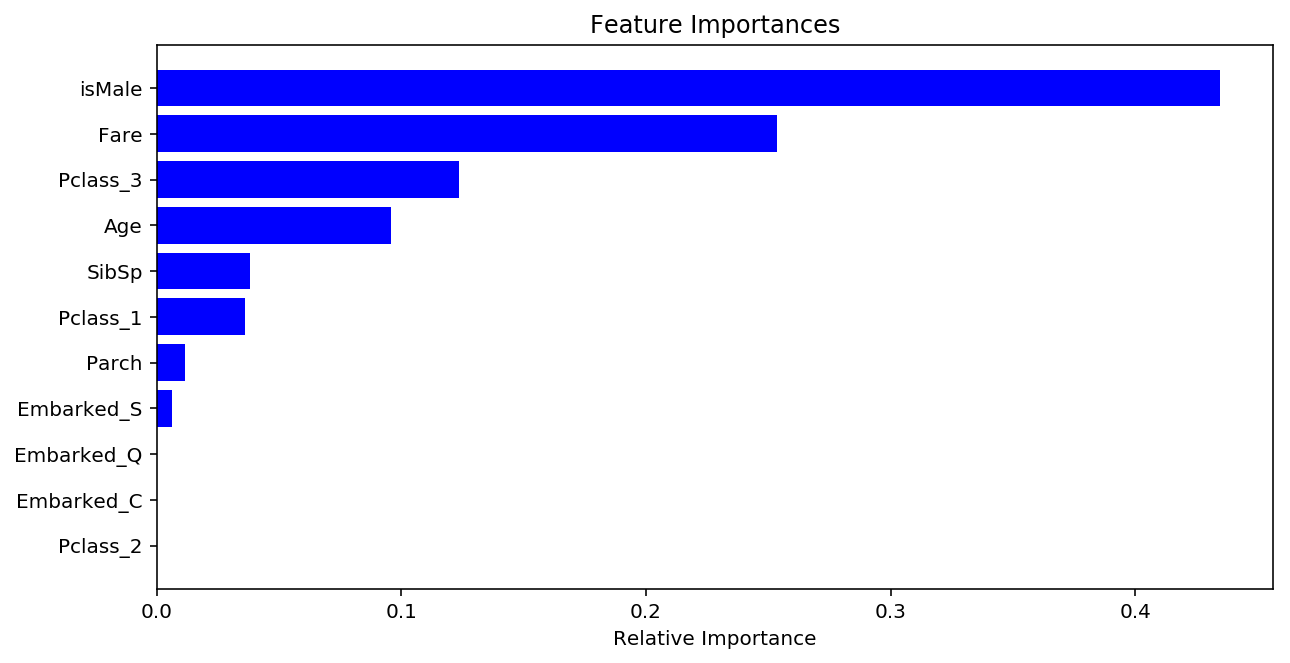

In [174]:
features = X_train.columns
importances = clf.feature_importances_

indices = np.argsort(importances)
plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [155]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [172]:
get_tree_dot_view(clf, features, str(list(y_train)))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Fare <= -0.437\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = [", fillcolor="#e5813960"] ;
1 [label="isMale <= -0.309\ngini = 0.317\nsamples = 339\nvalue = [272, 67]\nclass = [", fillcolor="#e58139c0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Fare <= -0.487\ngini = 0.489\nsamples = 66\nvalue = [28, 38]\nclass = 0", fillcolor="#399de543"] ;
1 -> 2 ;
3 [label="Embarked_S <= -0.498\ngini = 0.425\nsamples = 49\nvalue = [15, 34]\nclass = 0", fillcolor="#399de58e"] ;
2 -> 3 ;
4 [label="Fare <= -0.508\ngini = 0.328\nsamples = 29\nvalue = [6, 23]\nclass = 0", fillcolor="#399de5bc"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = [", fillcolor="#e58139ff"] ;
4 -> 5 ;
6 [label="gini = 0.293\nsamples = 28\nvalue = [5, 23]\nclass = 0", fillcolor="#399de5c8"] ;
4 -> 6 ;
7 [label="Fare <= -0.497\ngini = 0.495\nsamples = 20\nvalue = [9, 11]\nclass = 0", fillcolo